# WeatherPy
----
## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# import dependencies & libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# api key for Open Weather
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


In [19]:
# test response to parse json

base_url = "https://api.openweathermap.org/data/2.5/weather?"
target_city = "London"

city_url = f"{base_url}q={target_city}&units=Metric&appid={weather_api_key}"

response = requests.get(city_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1697127780,
    "id": 2643743,
    "main": {
        "feels_like": 15.51,
        "humidity": 93,
        "pressure": 1012,
        "temp": 15.48,
        "temp_max": 17.98,
        "temp_min": 12.86
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2006068,
        "sunrise": 1697091507,
        "sunset": 1697130924,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 3.09
    }
}


In [20]:
# test to read json correctly
lat = response["coord"]["lat"]
lon = response["coord"]["lon"]
max_temp = response["main"]["temp_max"]
humidity = response["main"]["humidity"]
clouds = response["clouds"]["all"]
wind = response["wind"]["speed"]
country = response["sys"]["country"]
date = response["dt"]
print(lat)
print(lon)
print(max_temp)
print(humidity)
print(clouds)
print(wind)
print(country)
print(date)

51.5085
-0.1257
17.98
93
100
3.09
GB
1697127780


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# set API base url
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&units=Metric&appid={weather_api_key}"
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | pionerskiy
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | bikenibeu village
Processing Record 10 of Set 1 | keflavik
Processing Record 11 of Set 1 | mulayjah
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | sur
Processing Record 17 of Set 1 | necochea
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | makurazaki
Processing Record 21 of Set 1 | katabu
Processing Record 22 of Set 1 | saurimo
Processing Record 23 

Processing Record 39 of Set 4 | north battleford
Processing Record 40 of Set 4 | jiayuguan
Processing Record 41 of Set 4 | fort wellington
Processing Record 42 of Set 4 | qurayyat
Processing Record 43 of Set 4 | juneau
Processing Record 44 of Set 4 | pitimbu
Processing Record 45 of Set 4 | aberdeen
Processing Record 46 of Set 4 | tolanaro
Processing Record 47 of Set 4 | cooper's town
Processing Record 48 of Set 4 | sayanogorsk
Processing Record 49 of Set 4 | rosarito
Processing Record 0 of Set 5 | jacobina
Processing Record 1 of Set 5 | toga village
City not found. Skipping...
Processing Record 2 of Set 5 | hays
Processing Record 3 of Set 5 | dhidhdhoo
Processing Record 4 of Set 5 | nar'yan-mar
Processing Record 5 of Set 5 | bolobo
Processing Record 6 of Set 5 | mount isa
Processing Record 7 of Set 5 | kapa'a
Processing Record 8 of Set 5 | wailua homesteads
Processing Record 9 of Set 5 | pochep
Processing Record 10 of Set 5 | la arena
Processing Record 11 of Set 5 | makoua
Processing R

Processing Record 25 of Set 8 | shingu
Processing Record 26 of Set 8 | urzhar
Processing Record 27 of Set 8 | lebu
Processing Record 28 of Set 8 | paramonga
Processing Record 29 of Set 8 | kokopo
Processing Record 30 of Set 8 | svetlyy
Processing Record 31 of Set 8 | abepura
Processing Record 32 of Set 8 | borba
Processing Record 33 of Set 8 | utrik
Processing Record 34 of Set 8 | haverfordwest
Processing Record 35 of Set 8 | christchurch
Processing Record 36 of Set 8 | nema
Processing Record 37 of Set 8 | st. john's
Processing Record 38 of Set 8 | murgud
Processing Record 39 of Set 8 | preobrazheniye
Processing Record 40 of Set 8 | villa gesell
Processing Record 41 of Set 8 | camana
Processing Record 42 of Set 8 | taltal
Processing Record 43 of Set 8 | tual
Processing Record 44 of Set 8 | nieuw amsterdam
Processing Record 45 of Set 8 | bechar
Processing Record 46 of Set 8 | coxim
Processing Record 47 of Set 8 | griffith
Processing Record 48 of Set 8 | san antonio de pale
Processing Re

Processing Record 20 of Set 12 | nahrin
Processing Record 21 of Set 12 | obo
Processing Record 22 of Set 12 | boa vista
Processing Record 23 of Set 12 | port douglas
Processing Record 24 of Set 12 | rawson
Processing Record 25 of Set 12 | jakiri
Processing Record 26 of Set 12 | semera
Processing Record 27 of Set 12 | tarrafal de sao nicolau
Processing Record 28 of Set 12 | rio preto da eva
Processing Record 29 of Set 12 | brownwood
Processing Record 30 of Set 12 | bridgewater
Processing Record 31 of Set 12 | natal
Processing Record 32 of Set 12 | zuwarah
Processing Record 33 of Set 12 | kidal
Processing Record 34 of Set 12 | inderbor
Processing Record 35 of Set 12 | carauari
Processing Record 36 of Set 12 | tefe
Processing Record 37 of Set 12 | juliaca
Processing Record 38 of Set 12 | val-d'or
Processing Record 39 of Set 12 | mirandela
Processing Record 40 of Set 12 | chernyshevskiy
Processing Record 41 of Set 12 | laela
Processing Record 42 of Set 12 | puerto penasco
Processing Record

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,-3.07,87,100,0.00,US,1697128471
1,west island,-12.1568,96.8225,25.99,78,100,7.72,CC,1697128597
2,east london,-33.0153,27.9116,16.52,82,20,4.63,ZA,1697128524
3,ust-nera,64.5667,143.2000,-12.10,97,92,2.24,RU,1697128598
4,pionerskiy,54.9508,20.2275,14.52,65,3,13.38,RU,1697128598


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,-3.07,87,100,0.00,US,1697128471
1,west island,-12.1568,96.8225,25.99,78,100,7.72,CC,1697128597
2,east london,-33.0153,27.9116,16.52,82,20,4.63,ZA,1697128524
3,ust-nera,64.5667,143.2000,-12.10,97,92,2.24,RU,1697128598
4,pionerskiy,54.9508,20.2275,14.52,65,3,13.38,RU,1697128598


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

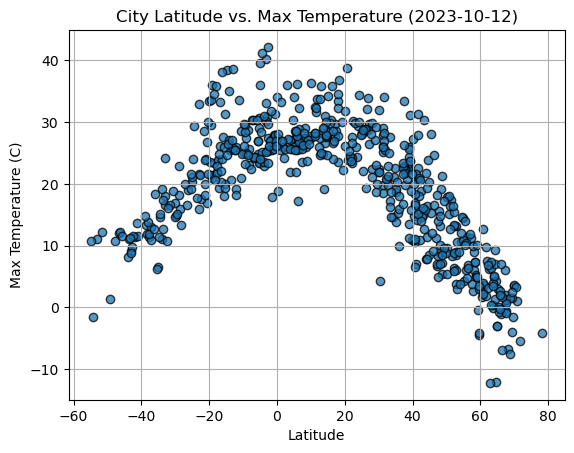

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

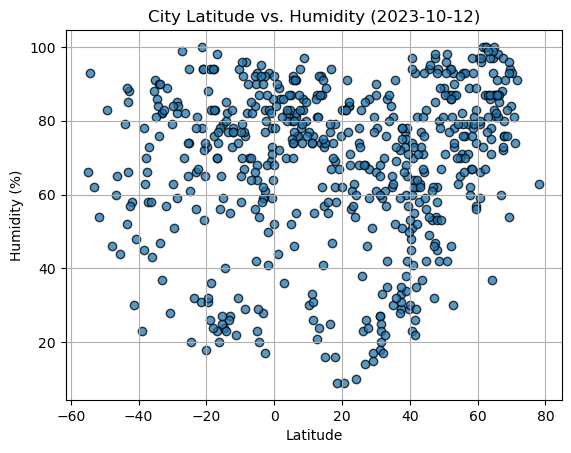

In [36]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

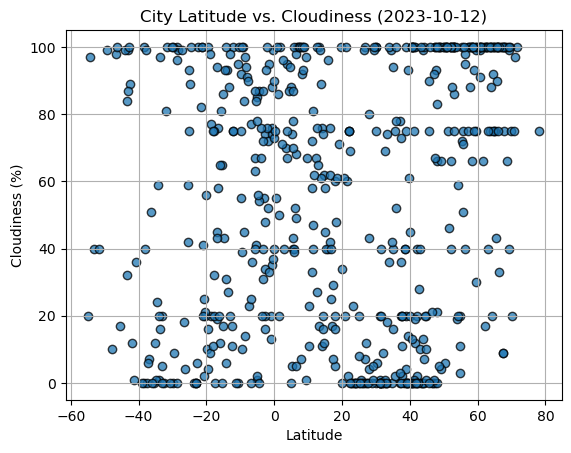

In [37]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude Vs. Wind Speed

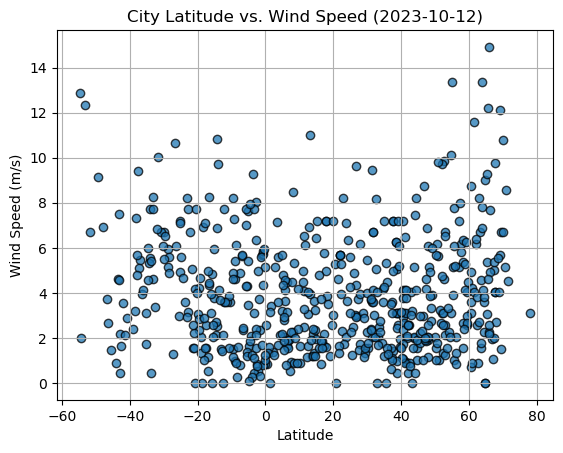

In [38]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

----
## Requirement 2: Complete Linear Regression for Each Relationship